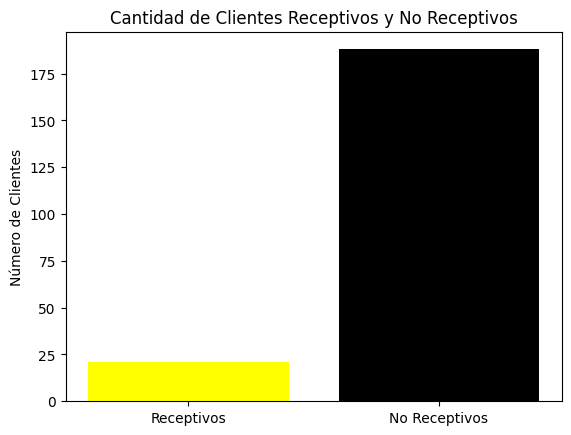

In [6]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from perceptron import Perceptron
from filtro import FiltroCandidatos


def ejecutar_modelo(tipo_producto, monto_producto):
    try:
        monto_producto = float(monto_producto)
    except ValueError:
        messagebox.showerror("Error", "Monto inválido. Debe ser un número.")
        return

    filtro = FiltroCandidatos()

    candidatos = filtro.filtrar(
        monto_min=monto_producto,
        categorias=[tipo_producto]
    )

    if len(candidatos) == 0:
        messagebox.showinfo("Sin resultados", "No hay candidatos para analizar.")
        return

    X = candidatos[["edad", "frecuencia", "monto_prom"]].values
    y = np.where((candidatos["frecuencia"] > 5) & (candidatos["monto_prom"] > 100), 1, 0)

    perceptron = Perceptron(input_size=3, learning_rate=0.001, epochs=50)
    perceptron.fit(X, y)
    perceptron.save()

    resultados = []
    for i, x in enumerate(X):
        pred = perceptron.predict(x)
        resultados.append({
            "edad": x[0],
            "frecuencia": x[1],
            "monto_prom": x[2],
            "prediccion": pred,
            "real": y[i],
            "acierto": pred == y[i]
        })

    df_resultados = pd.DataFrame(resultados)

    receptividad_promedio = df_resultados["prediccion"].mean() * 100
    acierto_promedio = df_resultados["acierto"].mean() * 100

    messagebox.showinfo(
        "Resultados",
        f"Clientes receptivos: {df_resultados['prediccion'].sum()}\n"
        f"Clientes no receptivos: {len(df_resultados) - df_resultados['prediccion'].sum()}\n"
        f"Receptividad promedio: {receptividad_promedio:.2f}%\n"
        f"Acierto promedio: {acierto_promedio:.2f}%"
    )

    etiquetas = ['Receptivos', 'No Receptivos']
    cantidades = [df_resultados["prediccion"].sum(), len(df_resultados) - df_resultados["prediccion"].sum()]

    plt.bar(etiquetas, cantidades, color=['yellow', 'black'])
    plt.title('Cantidad de Clientes Receptivos y No Receptivos')
    plt.ylabel('Número de Clientes')
    plt.show()


# GUI principal
def crear_gui():
    ventana = tk.Tk()
    ventana.title("Clasificador de Clientes con Perceptrón")
    ventana.geometry("400x250")

    ttk.Label(ventana, text="Tipo de Producto:").pack(pady=5)
    tipo_producto_entry = ttk.Entry(ventana, width=40)
    tipo_producto_entry.pack(pady=5)

    ttk.Label(ventana, text="Monto del Producto:").pack(pady=5)
    monto_producto_entry = ttk.Entry(ventana, width=40)
    monto_producto_entry.pack(pady=5)

    def on_ejecutar():
        tipo = tipo_producto_entry.get().strip()
        monto = monto_producto_entry.get().strip()
        if not tipo or not monto:
            messagebox.showerror("Error", "Por favor complete todos los campos.")
            return
        ejecutar_modelo(tipo, monto)

    ttk.Button(ventana, text="Ejecutar Clasificación", command=on_ejecutar).pack(pady=20)

    ventana.mainloop()


if __name__ == "__main__":
    crear_gui()
